# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as kr

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

# Importar data

In [ ]:
df = pd.read_excel('datos_tesina.xlsx')
data = df

# PRE PROCESAMIENTO

In [ ]:
data = df.drop(['q3'], axis=1)
nombres = ['x', 'y', 'z', 'phi', 'theta', 'psi', 'q1', 'q2', 'q4', 'q5', 'q6', 'q7']
data

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


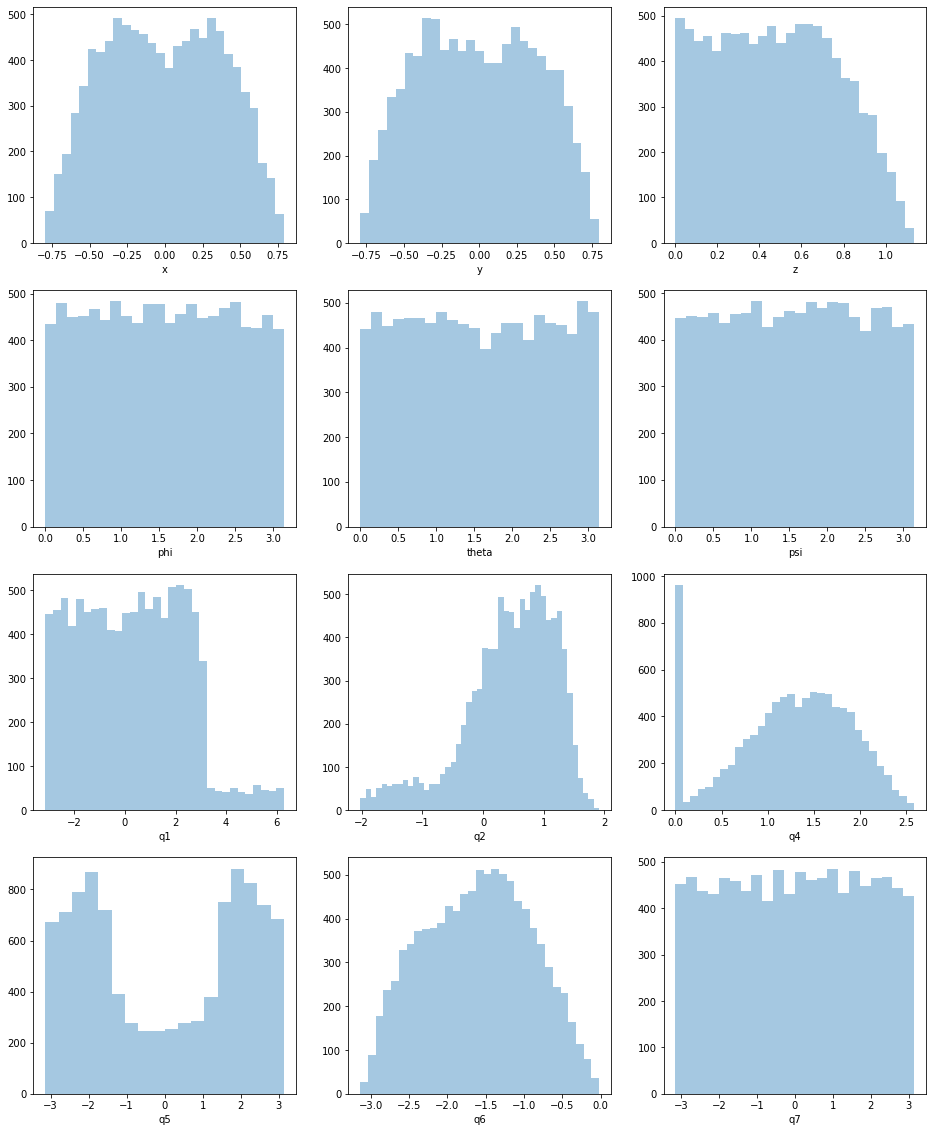

In [88]:
f, axes = plt.subplots(4, 3, figsize = (16,20), squeeze=True)
n=0
for i in range(0,4):
    for j in range(0,3):
        if n>12: break
        sns.distplot(data[nombres[n]], ax = axes[i,j], kde = False)
        n+=1
plt.show()

In [62]:
# Rescale data (between 0 and 1) 
from sklearn.preprocessing import MinMaxScaler #StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()
data[nombres[0:-6]] = scaler.fit_transform(data[nombres[0:-6]])

data

,x,y,z,phi,theta,psi,q1,q2,q4,q5,q6,q7
0,0.159888,0.177794,0.143606,0.789334,0.769795,0.319354,0.670615,-1.725471,0.000000,0.638371,-2.186074,-0.336828
1,0.173996,0.657796,0.345470,0.068246,0.300081,0.917476,2.891818,0.622340,1.732539,1.502674,-1.205165,1.689871
2,0.624008,0.272666,0.601233,0.306471,0.582196,0.742236,-0.947306,0.186138,1.387607,2.620345,-2.197973,2.733622
3,0.788221,0.856662,0.027577,0.870068,0.577947,0.532740,0.941006,1.477768,0.755464,2.827526,-0.980814,3.117999
4,0.264190,0.285901,0.821134,0.098987,0.046608,0.441969,0.613712,-0.765404,0.000000,2.424813,-2.359557,-2.075446
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.580710,0.156690,0.156137,0.828945,0.890702,0.743047,-1.345676,0.966797,1.953614,-0.015488,-1.102643,-1.811005
9996,0.283411,0.621702,0.164756,0.965993,0.556843,0.891723,2.394402,0.937538,1.885543,-2.328835,-1.449596,-2.710422
9997,0.879920,0.308832,0.392910,0.538661,0.118392,0.264013,-0.645432,0.791493,1.231704,-1.811843,-1.444788,2.448335
9998,0.553402,0.311184,0.598226,0.766107,0.990242,0.391606,-1.706557,-0.348852,2.097890,-1.555350,-1.310998,-0.165310


# ALGORITMO DE REDES NEURONALES

In [ ]:
# Se separan las caracteristicas y el Target
x = np.array(data.iloc[:,:6])
y = np.array(data.iloc[:,6:])

In [ ]:
# Se separa los datos en entrenamiento y prueba para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [22]:
lr = 0.0005
nn = [512, 256, 128, 64, 32, 16, 8, 7]
model = kr.Sequential()

model.add(kr.layers.Dense(nn[1], activation='relu'))
model.add(kr.layers.Dense(nn[2], activation='relu'))
model.add(kr.layers.Dense(nn[3], activation='relu'))
model.add(kr.layers.Dense(nn[4], activation='relu'))
model.add(kr.layers.Dense(nn[5], activation='relu'))
model.add(kr.layers.Dense(nn[6], activation='tanh'))
model.add(kr.layers.Dense(nn[7], activation='linear'))

model.compile(loss='mse', optimizer=kr.optimizers.Adam(learning_rate=lr, beta_1=0.7), metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=2000, validation_data=(x_test, y_test), batch_size=256)

Epoch 1/2000
28/28 [==============================] - 0s 5ms/step - loss: 2.3891 - acc: 0.2683 - val_loss: 2.1693 - val_acc: 0.3733
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step - loss: 1.9530 - acc: 0.3774 - val_loss: 1.7590 - val_acc: 0.3833
Epoch 3/2000
28/28 [==============================] - 0s 3ms/step - loss: 1.6933 - acc: 0.3761 - val_loss: 1.6343 - val_acc: 0.3993
Epoch 4/2000
28/28 [==============================] - 0s 2ms/step - loss: 1.5940 - acc: 0.3893 - val_loss: 1.5567 - val_acc: 0.4090
Epoch 5/2000
28/28 [==============================] - 0s 2ms/step - loss: 1.5338 - acc: 0.3897 - val_loss: 1.5088 - val_acc: 0.4273
Epoch 6/2000
28/28 [==============================] - 0s 2ms/step - loss: 1.4862 - acc: 0.3931 - val_loss: 1.4713 - val_acc: 0.4153
Epoch 7/2000
28/28 [==============================] - 0s 2ms/step - loss: 1.4421 - acc: 0.3977 - val_loss: 1.4308 - val_acc: 0.4167
Epoch 8/2000
28/28 [==============================] - 0s 2ms/step - loss: 1.

28/28 [==============================] - 0s 2ms/step - loss: 0.4123 - acc: 0.6989 - val_loss: 0.5731 - val_acc: 0.6743
Epoch 124/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.4089 - acc: 0.6990 - val_loss: 0.5854 - val_acc: 0.6643
Epoch 125/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.4109 - acc: 0.6983 - val_loss: 0.5540 - val_acc: 0.6707
Epoch 126/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.4051 - acc: 0.7007 - val_loss: 0.6080 - val_acc: 0.6640
Epoch 127/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.4063 - acc: 0.6977 - val_loss: 0.5416 - val_acc: 0.6773
Epoch 128/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.3894 - acc: 0.7034 - val_loss: 0.5464 - val_acc: 0.6700
Epoch 129/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.3974 - acc: 0.7006 - val_loss: 0.5326 - val_acc: 0.6717
Epoch 130/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.2061 - acc: 0.7966 - val_loss: 0.4505 - val_acc: 0.7480
Epoch 246/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.1987 - acc: 0.7969 - val_loss: 0.4273 - val_acc: 0.7500
Epoch 247/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.1980 - acc: 0.7949 - val_loss: 0.4179 - val_acc: 0.7437
Epoch 248/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1952 - acc: 0.8016 - val_loss: 0.4223 - val_acc: 0.7397
Epoch 249/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1960 - acc: 0.7970 - val_loss: 0.4152 - val_acc: 0.7407
Epoch 250/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.2021 - acc: 0.7996 - val_loss: 0.4146 - val_acc: 0.7443
Epoch 251/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.1894 - acc: 0.7981 - val_loss: 0.4147 - val_acc: 0.7493
Epoch 252/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.1414 - acc: 0.8364 - val_loss: 0.4303 - val_acc: 0.7770
Epoch 368/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1256 - acc: 0.8467 - val_loss: 0.4070 - val_acc: 0.7810
Epoch 369/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1160 - acc: 0.8476 - val_loss: 0.3995 - val_acc: 0.7930
Epoch 370/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1156 - acc: 0.8480 - val_loss: 0.3826 - val_acc: 0.7853
Epoch 371/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1228 - acc: 0.8430 - val_loss: 0.3725 - val_acc: 0.7830
Epoch 372/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1177 - acc: 0.8423 - val_loss: 0.3905 - val_acc: 0.7903
Epoch 373/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1218 - acc: 0.8469 - val_loss: 0.4167 - val_acc: 0.7817
Epoch 374/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.0853 - acc: 0.8696 - val_loss: 0.3812 - val_acc: 0.8000
Epoch 490/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0850 - acc: 0.8703 - val_loss: 0.3672 - val_acc: 0.8040
Epoch 491/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0755 - acc: 0.8766 - val_loss: 0.3705 - val_acc: 0.8047
Epoch 492/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1081 - acc: 0.8619 - val_loss: 0.5569 - val_acc: 0.7767
Epoch 493/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1167 - acc: 0.8609 - val_loss: 0.3841 - val_acc: 0.7953
Epoch 494/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0806 - acc: 0.8754 - val_loss: 0.4067 - val_acc: 0.7953
Epoch 495/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1176 - acc: 0.8593 - val_loss: 0.4082 - val_acc: 0.7940
Epoch 496/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.0554 - acc: 0.8966 - val_loss: 0.3572 - val_acc: 0.8173
Epoch 612/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0549 - acc: 0.8974 - val_loss: 0.3565 - val_acc: 0.8220
Epoch 613/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0528 - acc: 0.8977 - val_loss: 0.3604 - val_acc: 0.8237
Epoch 614/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0542 - acc: 0.8989 - val_loss: 0.3507 - val_acc: 0.8170
Epoch 615/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0540 - acc: 0.8983 - val_loss: 0.3615 - val_acc: 0.8293
Epoch 616/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0539 - acc: 0.8997 - val_loss: 0.3494 - val_acc: 0.8203
Epoch 617/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0530 - acc: 0.8994 - val_loss: 0.3579 - val_acc: 0.8153
Epoch 618/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.2056 - acc: 0.8407 - val_loss: 0.4020 - val_acc: 0.8087
Epoch 734/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0916 - acc: 0.8863 - val_loss: 0.3751 - val_acc: 0.8187
Epoch 735/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0535 - acc: 0.9001 - val_loss: 0.3705 - val_acc: 0.8187
Epoch 736/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0530 - acc: 0.9020 - val_loss: 0.3585 - val_acc: 0.8260
Epoch 737/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0445 - acc: 0.9090 - val_loss: 0.3511 - val_acc: 0.8257
Epoch 738/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0425 - acc: 0.9094 - val_loss: 0.3458 - val_acc: 0.8310
Epoch 739/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0435 - acc: 0.9107 - val_loss: 0.3551 - val_acc: 0.8313
Epoch 740/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.0343 - acc: 0.9197 - val_loss: 0.3568 - val_acc: 0.8327
Epoch 856/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0348 - acc: 0.9197 - val_loss: 0.3539 - val_acc: 0.8380
Epoch 857/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0341 - acc: 0.9180 - val_loss: 0.3549 - val_acc: 0.8393
Epoch 858/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0346 - acc: 0.9191 - val_loss: 0.3446 - val_acc: 0.8323
Epoch 859/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0342 - acc: 0.9189 - val_loss: 0.3532 - val_acc: 0.8387
Epoch 860/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0345 - acc: 0.9184 - val_loss: 0.3494 - val_acc: 0.8383
Epoch 861/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0385 - acc: 0.9166 - val_loss: 0.3541 - val_acc: 0.8407
Epoch 862/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

28/28 [==============================] - 0s 2ms/step - loss: 0.0304 - acc: 0.9261 - val_loss: 0.3431 - val_acc: 0.8447
Epoch 978/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0299 - acc: 0.9246 - val_loss: 0.3480 - val_acc: 0.8390
Epoch 979/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0306 - acc: 0.9223 - val_loss: 0.3485 - val_acc: 0.8373
Epoch 980/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0305 - acc: 0.9253 - val_loss: 0.3427 - val_acc: 0.8413
Epoch 981/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0303 - acc: 0.9243 - val_loss: 0.3474 - val_acc: 0.8363
Epoch 982/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0315 - acc: 0.9260 - val_loss: 0.3456 - val_acc: 0.8343
Epoch 983/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0661 - acc: 0.9047 - val_loss: 0.4322 - val_acc: 0.8140
Epoch 984/2000
28/28 [==============================] - 0s 2ms/step - loss: 0

Epoch 1038/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0271 - acc: 0.9277 - val_loss: 0.3335 - val_acc: 0.8420
Epoch 1039/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0275 - acc: 0.9284 - val_loss: 0.3354 - val_acc: 0.8423
Epoch 1040/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0283 - acc: 0.9270 - val_loss: 0.3337 - val_acc: 0.8407
Epoch 1041/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0355 - acc: 0.9227 - val_loss: 0.3598 - val_acc: 0.8383
Epoch 1042/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1074 - acc: 0.8919 - val_loss: 0.5598 - val_acc: 0.7683
Epoch 1043/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.2371 - acc: 0.8350 - val_loss: 0.4327 - val_acc: 0.8103
Epoch 1044/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1146 - acc: 0.8814 - val_loss: 0.3924 - val_acc: 0.8237
Epoch 1045/2000
28/28 [==============================] 

Epoch 1159/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0253 - acc: 0.9314 - val_loss: 0.3344 - val_acc: 0.8500
Epoch 1160/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0246 - acc: 0.9320 - val_loss: 0.3394 - val_acc: 0.8440
Epoch 1161/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0267 - acc: 0.9267 - val_loss: 0.3394 - val_acc: 0.8467
Epoch 1162/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0249 - acc: 0.9329 - val_loss: 0.3327 - val_acc: 0.8413
Epoch 1163/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0247 - acc: 0.9307 - val_loss: 0.3351 - val_acc: 0.8493
Epoch 1164/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0248 - acc: 0.9344 - val_loss: 0.3338 - val_acc: 0.8467
Epoch 1165/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0262 - acc: 0.9286 - val_loss: 0.3392 - val_acc: 0.8500
Epoch 1166/2000
28/28 [==============================] 

Epoch 1280/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0217 - acc: 0.9364 - val_loss: 0.3272 - val_acc: 0.8507
Epoch 1281/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0213 - acc: 0.9373 - val_loss: 0.3228 - val_acc: 0.8440
Epoch 1282/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0222 - acc: 0.9369 - val_loss: 0.3404 - val_acc: 0.8473
Epoch 1283/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0261 - acc: 0.9310 - val_loss: 0.3522 - val_acc: 0.8473
Epoch 1284/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0235 - acc: 0.9333 - val_loss: 0.3302 - val_acc: 0.8547
Epoch 1285/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0217 - acc: 0.9364 - val_loss: 0.3343 - val_acc: 0.8510
Epoch 1286/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0216 - acc: 0.9341 - val_loss: 0.3260 - val_acc: 0.8543
Epoch 1287/2000
28/28 [==============================] 

Epoch 1401/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0193 - acc: 0.9391 - val_loss: 0.3353 - val_acc: 0.8553
Epoch 1402/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0197 - acc: 0.9394 - val_loss: 0.3305 - val_acc: 0.8603
Epoch 1403/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0197 - acc: 0.9366 - val_loss: 0.3275 - val_acc: 0.8570
Epoch 1404/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0190 - acc: 0.9397 - val_loss: 0.3291 - val_acc: 0.8560
Epoch 1405/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0191 - acc: 0.9396 - val_loss: 0.3280 - val_acc: 0.8513
Epoch 1406/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0193 - acc: 0.9386 - val_loss: 0.3270 - val_acc: 0.8583
Epoch 1407/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0191 - acc: 0.9379 - val_loss: 0.3238 - val_acc: 0.8570
Epoch 1408/2000
28/28 [==============================] 

Epoch 1522/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0186 - acc: 0.9410 - val_loss: 0.3237 - val_acc: 0.8560
Epoch 1523/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0184 - acc: 0.9417 - val_loss: 0.3224 - val_acc: 0.8540
Epoch 1524/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0182 - acc: 0.9410 - val_loss: 0.3228 - val_acc: 0.8557
Epoch 1525/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0181 - acc: 0.9410 - val_loss: 0.3232 - val_acc: 0.8530
Epoch 1526/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0180 - acc: 0.9429 - val_loss: 0.3273 - val_acc: 0.8517
Epoch 1527/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0179 - acc: 0.9420 - val_loss: 0.3213 - val_acc: 0.8510
Epoch 1528/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0177 - acc: 0.9427 - val_loss: 0.3254 - val_acc: 0.8577
Epoch 1529/2000
28/28 [==============================] 

Epoch 1643/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1297 - acc: 0.8867 - val_loss: 0.4692 - val_acc: 0.8250
Epoch 1644/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.1222 - acc: 0.8826 - val_loss: 0.3722 - val_acc: 0.8403
Epoch 1645/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0509 - acc: 0.9181 - val_loss: 0.3555 - val_acc: 0.8470
Epoch 1646/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0289 - acc: 0.9303 - val_loss: 0.3288 - val_acc: 0.8593
Epoch 1647/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0231 - acc: 0.9387 - val_loss: 0.3233 - val_acc: 0.8467
Epoch 1648/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0215 - acc: 0.9393 - val_loss: 0.3202 - val_acc: 0.8590
Epoch 1649/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0186 - acc: 0.9413 - val_loss: 0.3350 - val_acc: 0.8533
Epoch 1650/2000
28/28 [==============================] 

Epoch 1764/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0169 - acc: 0.9437 - val_loss: 0.3138 - val_acc: 0.8613
Epoch 1765/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0163 - acc: 0.9441 - val_loss: 0.3196 - val_acc: 0.8610
Epoch 1766/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0161 - acc: 0.9440 - val_loss: 0.3159 - val_acc: 0.8627
Epoch 1767/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0157 - acc: 0.9457 - val_loss: 0.3188 - val_acc: 0.8583
Epoch 1768/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0157 - acc: 0.9454 - val_loss: 0.3187 - val_acc: 0.8590
Epoch 1769/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0154 - acc: 0.9453 - val_loss: 0.3185 - val_acc: 0.8603
Epoch 1770/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0152 - acc: 0.9433 - val_loss: 0.3207 - val_acc: 0.8577
Epoch 1771/2000
28/28 [==============================] 

Epoch 1885/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0140 - acc: 0.9481 - val_loss: 0.3301 - val_acc: 0.8610
Epoch 1886/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0144 - acc: 0.9481 - val_loss: 0.3242 - val_acc: 0.8620
Epoch 1887/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0145 - acc: 0.9471 - val_loss: 0.3260 - val_acc: 0.8593
Epoch 1888/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0142 - acc: 0.9476 - val_loss: 0.3235 - val_acc: 0.8650
Epoch 1889/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0140 - acc: 0.9511 - val_loss: 0.3251 - val_acc: 0.8640
Epoch 1890/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0146 - acc: 0.9466 - val_loss: 0.3303 - val_acc: 0.8623
Epoch 1891/2000
28/28 [==============================] - 0s 2ms/step - loss: 0.0148 - acc: 0.9484 - val_loss: 0.3465 - val_acc: 0.8593
Epoch 1892/2000
28/28 [==============================] 

In [31]:
%matplotlib
# lista de datos history
print(hist.history.keys())
# hacemos las grafica 1 precision
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()
# hacemos las grafica 2 perdidas
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

Using matplotlib backend: Qt5Agg
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [30]:
# hacemos las grafica 2 perdidas
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [24]:
score, acc = model.evaluate(x_test, y_test, batch_size=256)

12/12 [==============================] - 0s 1ms/step - loss: 0.3170 - acc: 0.8643


In [25]:
print('Test score:', score)
print('Test accuracy:', acc)
print('Error: ', 1-acc)

Test score: 0.3170131742954254
Test accuracy: 0.8643333315849304
Error:  0.13566666841506958


# Exportacion del modelo

In [26]:
model.save('model_accuracy_86%')

INFO:tensorflow:Assets written to: model_accuracy_86%\assets


In [31]:
new_model = kr.models.load_model('model_accuracy_86%')

# OTROS

In [ ]:
lr = 0.0005
nn = [512, 256, 128, 64, 6]

model = kr.Sequential()

model.add(kr.layers.Dense(nn[1], activation='relu'))
model.add(kr.layers.Dense(nn[2], activation='tanh'))
model.add(kr.layers.Dense(nn[3], activation='tanh'))
model.add(kr.layers.Dense(nn[4], activation='linear'))

model.compile(loss='mse', optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=['acc'])

model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=None)

In [ ]:
0.7433 (100 epoch)
0.84 (600 epoch)

In [ ]:
lr = 0.005
nn = [512, 256, 128, 64, 32, 6]

model = kr.Sequential()

model.add(kr.layers.Dense(nn[1], activation='relu'))
model.add(kr.layers.Dense(nn[2], activation='relu'))
model.add(kr.layers.Dense(nn[3], activation='relu'))
model.add(kr.layers.Dense(nn[4], activation='tanh'))
model.add(kr.layers.Dense(nn[5], activation='linear'))

model.compile(loss='mse', optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=['acc'])

model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=256)

In [ ]:
0.8047

In [ ]:
lr = 0.0005 # learning rate
nn = [256, 128, 64, 6]  # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

model.add(kr.layers.Dense(nn[1], activation='relu'))
model.add(kr.layers.Dense(nn[2], activation='tanh'))
model.add(kr.layers.Dense(nn[3], activation='linear'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=None)

In [ ]:
0.6207